<a href="https://colab.research.google.com/github/obedientavocado/finalproject/blob/main/pythonproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy vs. GDP per Capita between 1950-2018



My project relies primarily on a dataset that examines the relationship between life expectancy and gross domestic product (GDP) per capita from 1950 to 2018. GDP per capita is an indicator of the strength of the economy and its economic growth. Life expectancy is one of the most important factors when considering the social well-being of a nation. The dataset contains historical population estimates for 239 nations, including city-states such as Vatican City. It includes data on GDP per capita for each country and the corresponding life expectancy for each year.
It is important to note that the dataset contains numerous missing data points, and I opted to exclude these points rather than consider them to be zero. This assumption has significant implications for interpretation and analysis of the data.

The packages below are required to read the existing raw csv file as a dataframe that can then be interpreted and visualised using the other packages.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm

In [53]:
df = pd.read_csv("Life Expectancy vs GDP 1950-2018.csv")
df

,Country,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Afghanistan,1950,27.638,1156.0000,7752117.0,Asia
1,Afghanistan,1951,27.878,1170.0000,7840151.0,Asia
2,Afghanistan,1952,28.361,1189.0000,7935996.0,Asia
3,Afghanistan,1953,28.852,1240.0000,8039684.0,Asia
4,Afghanistan,1954,29.350,1245.0000,8151316.0,Asia
...,...,...,...,...,...,...
16449,Zimbabwe,2015,59.534,1560.0000,13814642.0,Africa
16450,Zimbabwe,2016,60.294,1534.0000,14030338.0,Africa
16451,Zimbabwe,2017,60.812,1582.3662,14236599.0,Africa
16452,Zimbabwe,2018,61.195,1611.4052,14438812.0,Africa


the average GDP and Life expectancy of each country is calculated and illustrated distributed by continents.

In [54]:
avg_gdp = df.groupby("Country")["GDP per capita"].mean()
avg_le = df.groupby("Country")["Life expectancy"].mean()

class allows me to sort the countries in their continents allowing for a more clearly understanding of the distribution and statistically categorisation of the data.

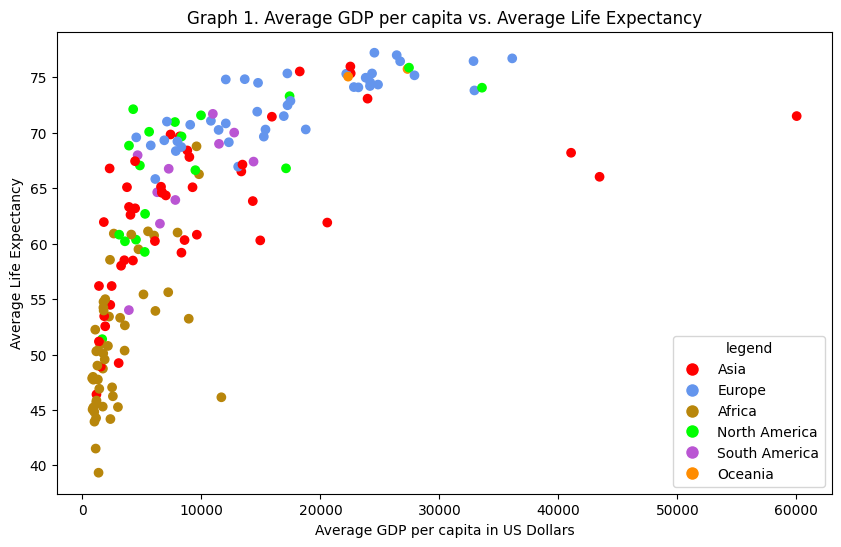

In [55]:
grouped_df = df.groupby('Country').first().reset_index()
grouped_df.describe()
continent_colors = {
  'Asia': 'red',
  'Europe': 'cornflowerblue',
  'Africa': 'darkgoldenrod',
  'North America': 'lime',
  'South America': 'mediumorchid',
  'Oceania': 'darkorange'
}

grouped_df['Color'] = grouped_df['Continent'].map(continent_colors)


fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(avg_gdp, avg_le, c=grouped_df['Color'])
ax.set_xlabel('Average GDP per capita in US Dollars')
ax.set_ylabel('Average Life Expectancy')
ax.set_title('Graph 1. Average GDP per capita vs. Average Life Expectancy')
handles = []
for continent, color in continent_colors.items():
  handle = plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
  handles.append(handle)

ax.legend(handles=handles, title='legend', fontsize='10')

plt.show()

Jointplot allows a clearer understanding of a scattergraph with numerous points (especially on top of one another). Enables us to calculate the sum of points along the axis

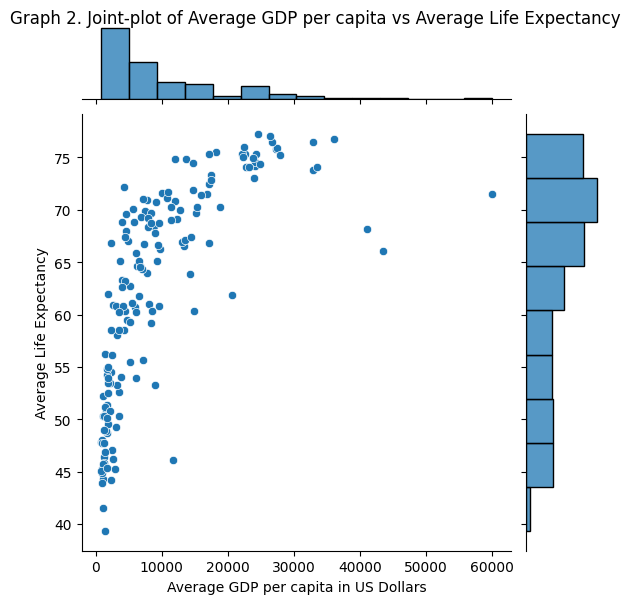

In [5]:
jointplot = sns.jointplot(data=df, x=avg_gdp, y=avg_le, kind="scatter")
jointplot.set_axis_labels(xlabel="Average GDP per capita in US Dollars", ylabel="Average Life Expectancy")
jointplot.fig.suptitle("Graph 2. Joint-plot of Average GDP per capita vs Average Life Expectancy", y=1.00)

plt.show()

As a statistics student the mean value along with quartiles and data description is always interesting points to highlight.

In [6]:
continent_stats = df.groupby('Continent').agg({'Life expectancy': 'mean', 'GDP per capita': 'mean'})
continent_stats.columns = ['Average Life Expectancy', 'Average GDP per capita in USD']
world_avg_gdp = round(df['GDP per capita'].mean(), 2)
world_avg_le = round(df['Life expectancy'].mean(), 2)
continent_stats.append = [{world_avg_le, world_avg_gdp}]
continent_stats.reset_index(inplace=True)

print("Table 1. The Average Life Expectancy and average GDP per capita of each individual continent")
print(round(continent_stats, 2))

Table 1. The Average Life Expectancy and average GDP per capita of each individual continent
       Continent  Average Life Expectancy  Average GDP per capita in USD
0         Africa                    51.92                        3024.01
1           Asia                    62.51                       10966.88
2         Europe                    72.76                       17725.84
3  North America                    68.57                        9617.11
4        Oceania                    64.61                       24825.53
5  South America                    66.41                        8600.73


In [7]:
def first_quartile(x):
  return x.quantile(0.25)

def third_quartile(x):
  return x.quantile(0.75)

continent_quartiles = df.groupby('Continent')['GDP per capita'].agg(['mean', 'min', first_quartile, 'median', third_quartile, 'max'])
continent_quartiles.columns = ['Mean', 'Min', 'First Q', 'Median', 'Third Q', 'Max']

print("Table 2. The basic statistical data of average GDP per capita in US Dollars of each individual continent")
print(round(continent_quartiles,2))

print("\nTable 3. The basic statistical data from the GDP per capita in US Dollars from all across the world since 1950")
print(df['GDP per capita'].describe())


Table 2. The basic statistical data of average GDP per capita in US Dollars of each individual continent
                   Mean       Min   First Q    Median   Third Q        Max
Continent                                                                 
Africa          3024.01    377.58   1146.17   1672.00   3114.00   47562.32
Asia           10966.88    428.42   2116.13   4994.05  11646.04  156299.00
Europe         17725.84    824.00   8505.00  14067.00  24349.96   84580.14
North America   9617.11    980.00   3324.00   5742.64  11801.75   55334.74
Oceania        24825.53  11815.00  17166.25  21985.00  31124.46   49830.80
South America   8600.73   2236.00   4932.75   7615.00  11757.00   22104.77

Table 3. The basic statistical data from the GDP per capita in US Dollars from all across the world since 1950
count     10929.000000
mean       9833.266158
std       12552.806357
min         377.580100
25%        1867.605900
50%        5054.000000
75%       12506.000000
max      156299.000000

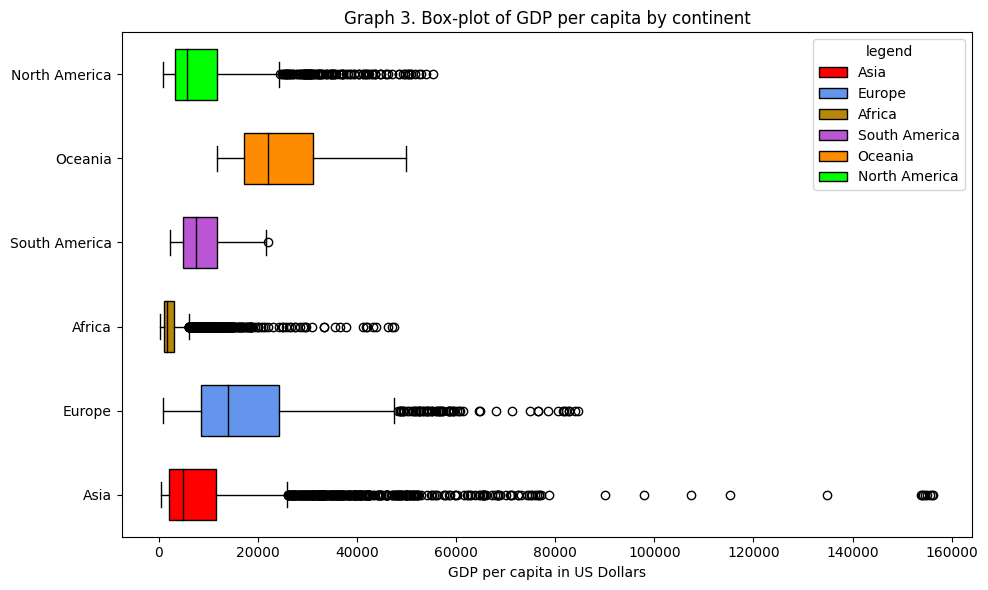

In [8]:
boxplot_data = df[(df['GDP per capita'] > 0) & ~df['GDP per capita'].isnull()]
boxplot_data = boxplot_data.astype({'GDP per capita': int})

boxplot_continent = boxplot_data['Continent'].unique()

plt.figure(figsize=(10, 6))

boxplot_list = []
labels = []

for x, continent in enumerate(boxplot_continent):
  boxplot = plt.boxplot(boxplot_data[boxplot_data['Continent'] == continent]['GDP per capita'],
                        positions=[x],
                        vert=False,
                        widths=0.6,
                        patch_artist=True,
                        boxprops=dict(facecolor=continent_colors[continent], color='black'),
                        whiskerprops=dict(color='black'),
                        capprops=dict(color='black'),
                        medianprops=dict(color='black'))
  boxplot_list.append(boxplot)
  labels.append(continent)
plt.xlabel('GDP per capita in US Dollars')
plt.yticks(range(len(labels)), labels)
plt.title('Graph 3. Box-plot of GDP per capita by continent')
legend_list = [boxplot_list[0]['boxes'][0], boxplot_list[1]['boxes'][0], boxplot_list[2]['boxes'][0],
               boxplot_list[3]['boxes'][0], boxplot_list[4]['boxes'][0], boxplot_list[5]['boxes'][0]]
plt.legend(legend_list, labels, loc='upper right', title='legend', fontsize= '10')

plt.tight_layout()
plt.show()


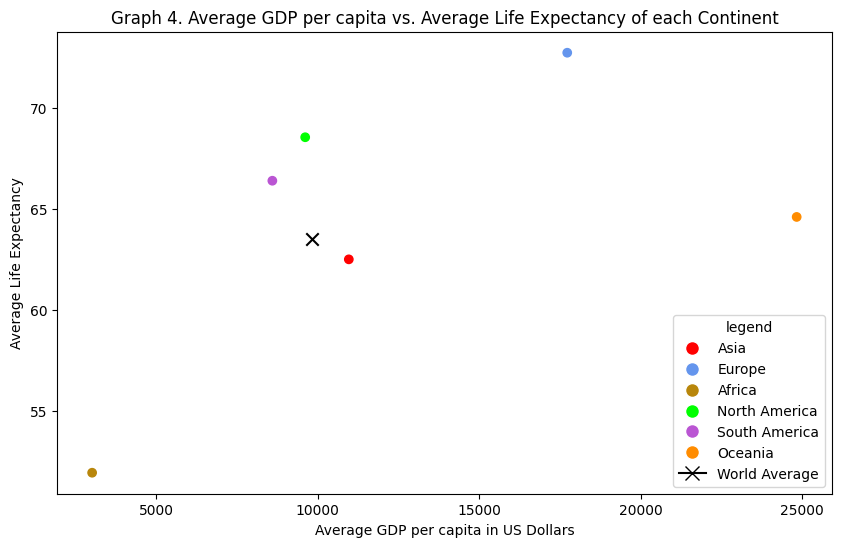

In [9]:
continents = df.groupby('Continent').agg({'Life expectancy': 'mean', 'GDP per capita': 'mean'})
continents.columns = ['Average Life Expectancy', 'Average GDP per capita']
continents.reset_index(inplace=True)
continent_color= [continent_colors[continent] for continent in continents['Continent']]

world_avg_gdp = round(df['GDP per capita'].mean(), 2)
world_avg_le = round(df['Life expectancy'].mean(), 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(world_avg_gdp, world_avg_le, color='black', marker='x', s=80, label='World Average')
plt.scatter(continents['Average GDP per capita'], continents['Average Life Expectancy'], c=continent_color)
plt.xlabel('Average GDP per capita in US Dollars')
plt.ylabel('Average Life Expectancy')
plt.title('Graph 4. Average GDP per capita vs. Average Life Expectancy of each Continent')
handles = []
for continent, color in continent_colors.items():
  handle = plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
  handles.append(handle)
handles.extend([plt.Line2D([], [], marker='x', color='black', markersize=10, label='World Average')])

ax.legend(handles=handles, title='legend', loc='lower right', fontsize = '10')
plt.show()


In [13]:
world_avg_le = round(df['Life expectancy'].mean(), 2)
world_avg_gdp = round(df['GDP per capita'].mean(), 2)

top_50_le =round(df['Life expectancy'].quantile(0.5), 2)
top_30_le =round(df['Life expectancy'].quantile(0.7), 2)
top_10_le =round(df['Life expectancy'].quantile(0.9), 2)
top_1_le =round(df['Life expectancy'].quantile(0.99), 2)

top_50_avg_le = df[df['Life expectancy'] >= top_50_le]
top_30_avg_le = df[df['Life expectancy'] >= top_30_le]
top_10_avg_le = df[df['Life expectancy'] >= top_10_le]
top_1_avg_le = df[df['Life expectancy'] >= top_1_le]

top_50_gdp_le = round(top_50_avg_le['GDP per capita'].mean(), 2)
top_30_gdp_le = round(top_30_avg_le['GDP per capita'].mean(), 2)
top_10_gdp_le = round(top_10_avg_le['GDP per capita'].mean(), 2)
top_1_gdp_le = round(top_1_avg_le['GDP per capita'].mean(), 2)


data_le = {
    'Population Segment': ['World', 'Top 50%', 'Top 30%', 'Top 10%', 'Top 1%'],
    'Average Life Expectancy': [world_avg_le, top_50_le, top_30_le, top_10_le, top_1_le],
    'Average GDP per capita in USD': [world_avg_gdp, top_50_gdp_le, top_30_gdp_le, top_10_gdp_le, top_1_gdp_le]
}

table5 = pd.DataFrame(data_le)
print("Table 3. Different percentage tiers of the Average Life Expectancy and their respective Average GDP per capita")
print(table5)


Table 3. Different percentage tiers of the Average Life Expectancy and their respective Average GDP per capita
  Population Segment  Average Life Expectancy  Average GDP per capita in USD
0              World                    63.53                        9833.27
1            Top 50%                    66.51                       16893.60
2            Top 30%                    71.48                       22121.64
3            Top 10%                    77.08                       35159.34
4             Top 1%                    82.33                       43299.73


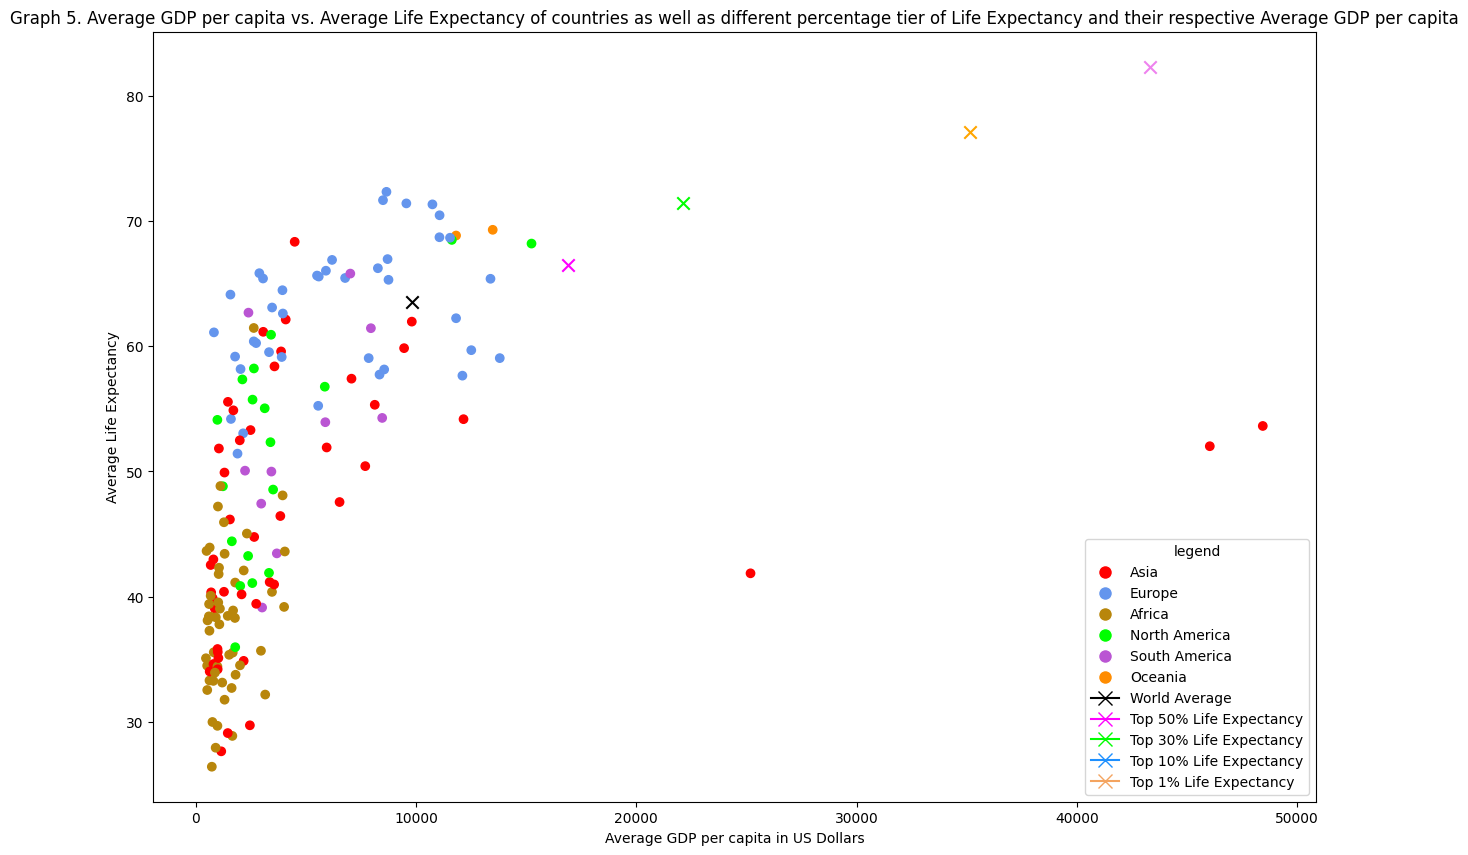

In [15]:
grouped_df = df.groupby('Country').first().reset_index()

grouped_df['Color'] = grouped_df['Continent'].map(continent_colors)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(grouped_df['GDP per capita'], grouped_df['Life expectancy'], c=grouped_df['Color'], label='Countries')
ax.scatter(world_avg_gdp, world_avg_le, color='black', marker='x', s=80, label='World Average')
ax.scatter(top_50_gdp_le, top_50_le, color='fuchsia', marker='x', s=80, label='Top 50%')
ax.scatter(top_30_gdp_le, top_30_le, color='lime', marker='x', s=80, label='Top 30%')
ax.scatter(top_10_gdp_le, top_10_le, color='orange', marker='x', s=80, label='Top 10%')
ax.scatter(top_1_gdp_le, top_1_le, color='violet', marker='x', s=80, label='Top 1%')

ax.set_xlabel('Average GDP per capita in US Dollars')
ax.set_ylabel('Average Life Expectancy')
ax.set_title('Graph 5. Average GDP per capita vs. Average Life Expectancy of countries as well as different percentage tier of Life Expectancy and their respective Average GDP per capita')

handles = []
for continent, color in continent_colors.items():
  handle = plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
  handles.append(handle)
handles.extend([plt.Line2D([], [], marker='x', color='black', markersize=10, label='World Average'),
                plt.Line2D([], [], marker='x', color='magenta', markersize=10, label='Top 50% Life Expectancy'),
                plt.Line2D([], [], marker='x', color='lime', markersize=10, label='Top 30% Life Expectancy'),
                plt.Line2D([], [], marker='x', color='dodgerblue', markersize=10, label='Top 10% Life Expectancy'),
                plt.Line2D([], [], marker='x', color='sandybrown', markersize=10, label='Top 1% Life Expectancy')])

ax.legend(title="legend", handles=handles, fontsize='10', loc='lower right')
plt.show()

taking a look at the way the GDP or Life expectancy is distributed among the percentiles (the whole population being 100, with the richest/oldest being the top 1%).

> life expectancy seems to be a lot more fairly distributed than the GDP per capita.



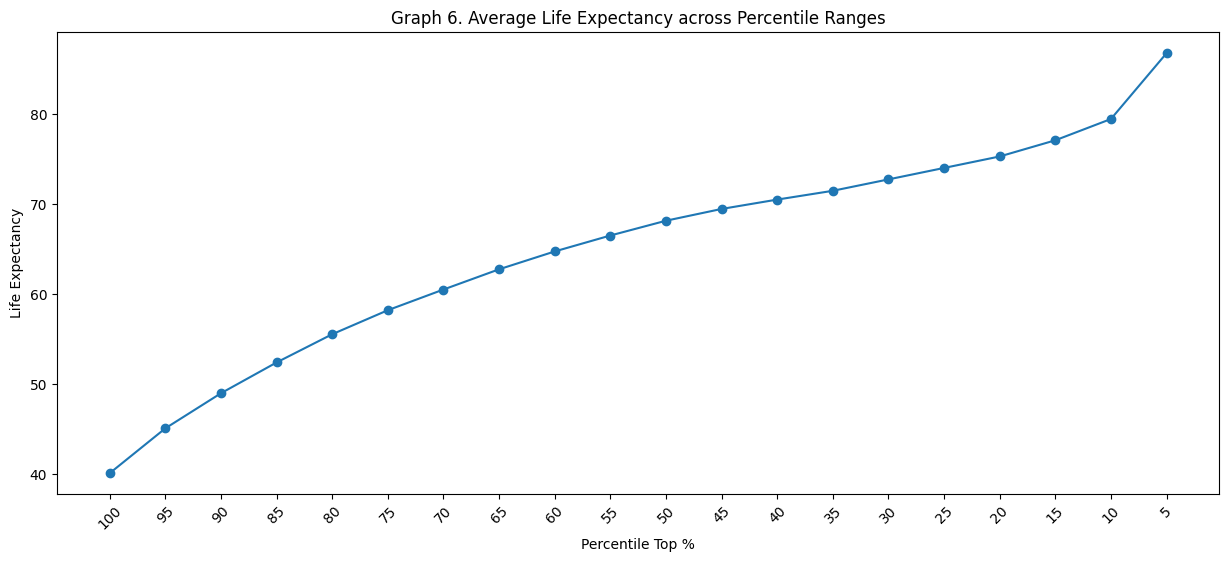

In [16]:
percentiles = list(range(100, 1, -5))
le_percentiles = []

for percentile in percentiles:
  tiers_le = df['Life expectancy'].quantile(percentile / 100)
  le_percentiles.append(tiers_le)

le_percentiles.sort()

percentile_ranges = [f'{p}' for p in percentiles]

plt.figure(figsize=(15, 6))
plt.plot(percentile_ranges, le_percentiles, marker='o')
plt.xlabel('Percentile Top %')
plt.ylabel('Life Expectancy')
plt.title('Graph 6. Average Life Expectancy across Percentile Ranges')
plt.xticks(rotation=45)
plt.show()


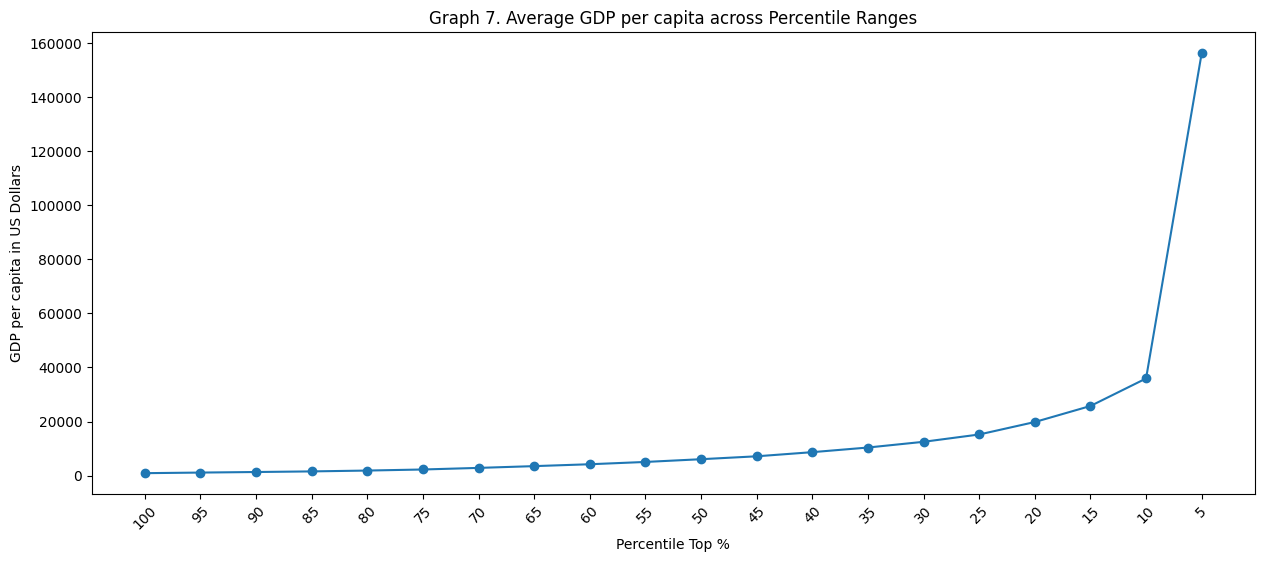

In [17]:
percentiles = list(range(100, 1, -5))
gdp_percentiles = []

for percentile in percentiles:
  tiers_gdp = df['GDP per capita'].quantile(percentile / 100)
  gdp_percentiles.append(tiers_gdp)

gdp_percentiles.sort()

percentile_ranges = [f'{p}' for p in percentiles]

plt.figure(figsize=(15, 6))
plt.plot(percentile_ranges, gdp_percentiles, marker='o')
plt.xlabel('Percentile Top %')
plt.ylabel('GDP per capita in US Dollars')
plt.title('Graph 7. Average GDP per capita across Percentile Ranges')
plt.xticks(rotation=45)
plt.show()


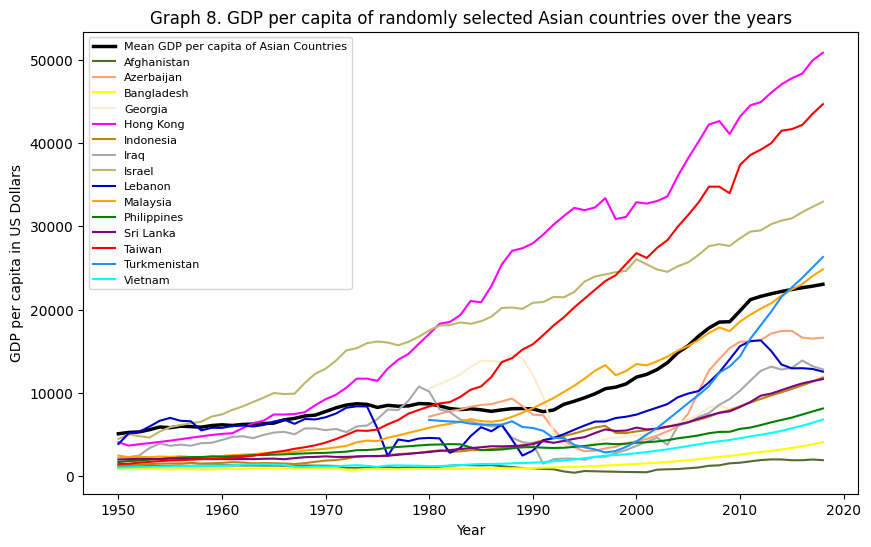

In [18]:
asia = df[df['Continent'] == 'Asia']
asia_with_gdp = asia.groupby('Country')['GDP per capita'].count()
valid_asia = asia_with_gdp[asia_with_gdp >= 10].index.tolist()
random_countries_asia = np.random.choice(valid_asia, size=15, replace=False)
asia_df = asia[asia['Country'].isin(random_countries_asia)]

colors = ['dodgerblue', 'red', 'green', 'yellow', 'purple', 'orange', 'mediumblue', 'blanchedalmond', 'magenta', 'cyan', 'darkgoldenrod', 'darkgrey', 'darkolivegreen', 'lightsalmon', 'darkkhaki']
country_color_mapping_asia = dict(zip(random_countries_asia, colors))

fig, ax = plt.subplots(figsize=(10, 6))
mean_gdp_asia = asia.groupby('Year')['GDP per capita'].mean()
ax.plot(mean_gdp_asia.index, mean_gdp_asia, color='black', linewidth=2.5, label='Mean GDP per capita of Asian Countries')

for country, data in asia_df.groupby('Country'):
  color = country_color_mapping_asia[country]
  ax.plot(data['Year'], data['GDP per capita'], label=country, color=color)

ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita in US Dollars')
ax.set_title('Graph 8. GDP per capita of randomly selected Asian countries over the years')
ax.legend(fontsize='8', loc='upper left')

plt.show()


In [19]:
le_table_asia = asia_df.pivot(index='Year', columns='Country', values='Life expectancy')
mean_le_asia = asia_df.groupby('Year')['Life expectancy'].mean()
le_table_asia['Mean'] = mean_le_asia.values

pd.set_option('display.max_columns', None)
print("Table 4. Life Expectancy of randomly selected Asian countries over the years")
print(round(le_table_asia, 2))

Table 4. Life Expectancy of randomly selected Asian countries over the years
Country  Afghanistan  Azerbaijan  Bangladesh  Georgia  Hong Kong  Indonesia  \
Year                                                                          
1950           27.64       57.41       39.05    59.85      62.14      40.38   
1951           27.88       57.68       39.44    60.05      62.38      40.73   
1952           28.36       58.21       40.20    60.45      62.88      41.42   
1953           28.85       58.70       40.93    60.85      63.40      42.11   
1954           29.35       59.14       41.63    61.25      63.93      42.78   
...              ...         ...         ...      ...        ...        ...   
2015           63.38       72.27       71.51    72.97      84.04      70.77   
2016           63.76       72.49       71.78    73.21      84.28      71.04   
2017           64.13       72.69       72.05    73.41      84.49      71.28   
2018           64.49       72.86       72.32    73.60 

Each cell in the heatmap represents the average life expectancy for a specific continent during a particular decade. The color intensity of each cell represents the average life expectancy, with higher values indicated by darker shades and lower values indicated by lighter shades.

This visualization allows for the comparison of average life expectancy trends across different continents over the specified decades, providing insights into how life expectancy has changed over time within each continent.


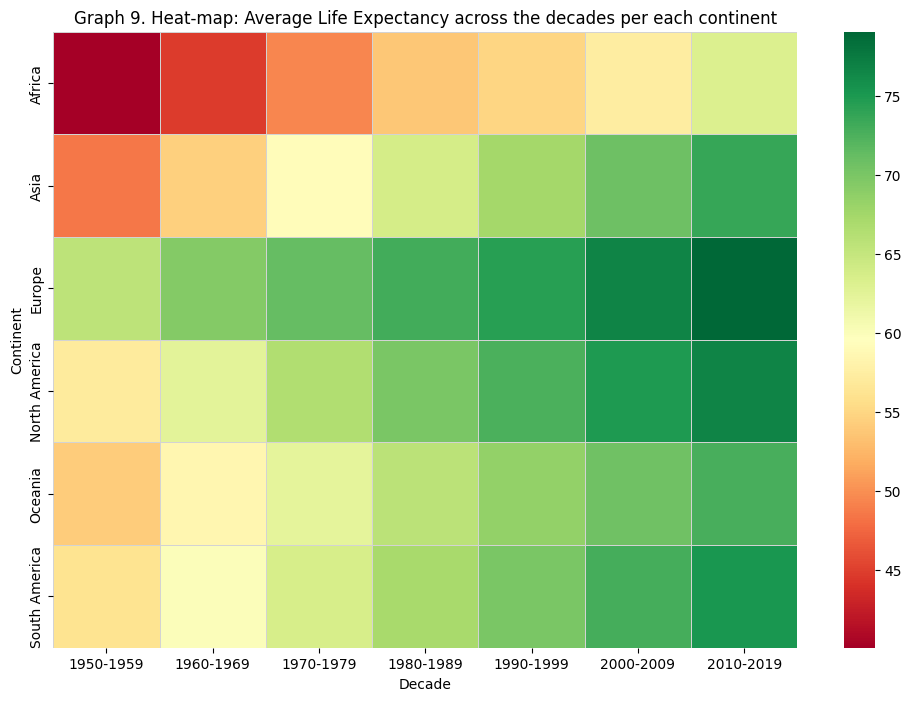

In [20]:
decades = [(1950, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]

df['Decade'] = df['Year'].apply(lambda year: next((f"{start}-{end}" for start, end in decades if start <= year <= end)))
heatmap = df.pivot_table(index='Continent', columns='Decade', values='Life expectancy', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, cmap='RdYlGn', linewidths=0.5, linecolor='lightgray')
plt.title('Graph 9. Heat-map: Average Life Expectancy across the decades per each continent')
plt.xlabel('Decade')
plt.ylabel('Continent')

plt.show()


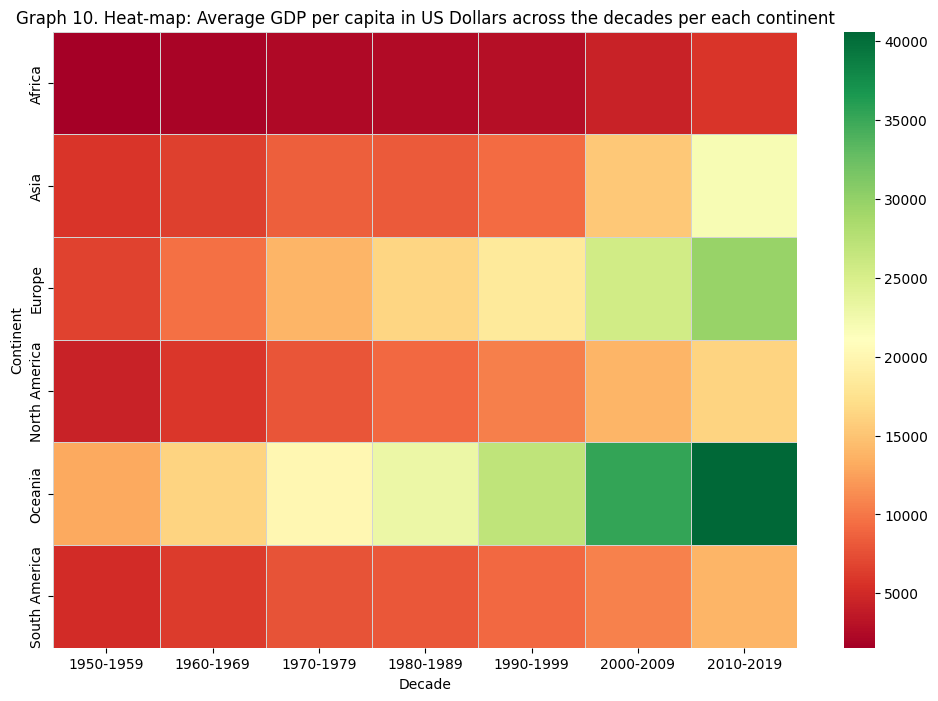

In [21]:
decades = [(1950, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]

df['Decade'] = df['Year'].apply(lambda year: next((f"{start}-{end}" for start, end in decades if start <= year <= end)))
heatmap = df.pivot_table(index='Continent', columns='Decade', values='GDP per capita', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, cmap='RdYlGn', linewidths=0.5, linecolor='lightgray')
plt.title('Graph 10. Heat-map: Average GDP per capita in US Dollars across the decades per each continent')
plt.xlabel('Decade')
plt.ylabel('Continent')

plt.show()

Diagonal Plots: Each diagonal plot represents the distribution of Life expectancy, GDP per capita, Population for each country over the years.

Off-Diagonal Plots: Each off-diagonal plot represents the relationship between two variables, Life expectancy vs. GDP per capita, Life expectancy vs. Population, GDP per capita vs. Population, for each country over the years.

Hue: The hue parameter is set to 'Country', which colors the data points in each scatterplot based on the country they belong to. This helps in distinguishing data points from different countries in the pair plot.


Graph 11. Pair-plots of Bulgaria, Chad, Saudi Arabia, Venezuela, Haiti, Oman on their Life expectancy, GDP per capita, Population over the Years


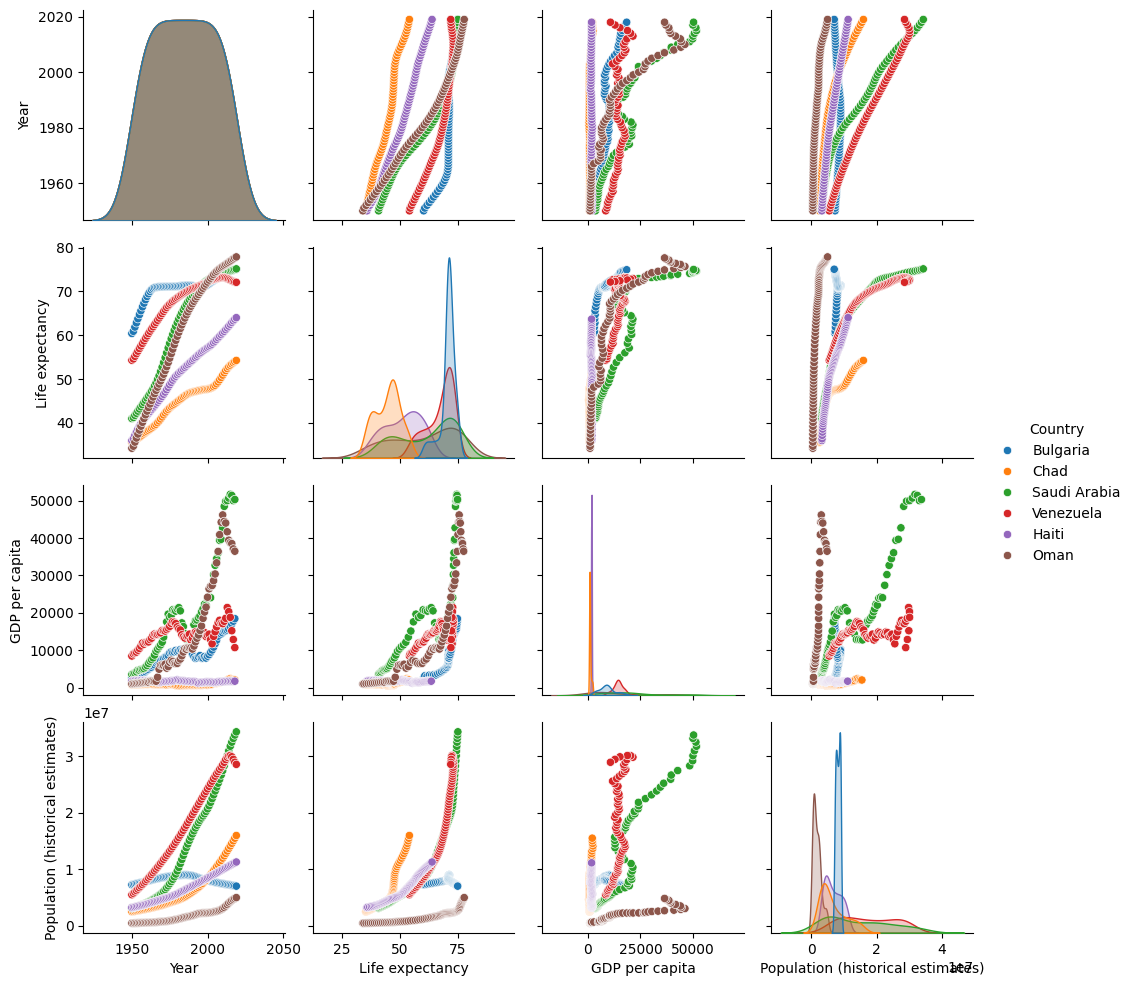

In [22]:
bulgaria = df[df['Country'] == 'Bulgaria']
chad = df[df['Country'] == 'Chad']
saudiarabia = df[df['Country'] == 'Saudi Arabia']
venezuela = df[df['Country'] == 'Venezuela']
haiti = df[df['Country'] == 'Haiti']
oman = df[df['Country'] == 'Oman']


combined_data = pd.concat([bulgaria , chad, saudiarabia, venezuela, haiti, oman])

print("Graph 11. Pair-plots of Bulgaria, Chad, Saudi Arabia, Venezuela, Haiti, Oman on their Life expectancy, GDP per capita, Population over the Years")
sns.pairplot(data=combined_data, hue= 'Country')
plt.show()


Choropleth map visualizing the average GDP per capita across different countries. This visualization helps in understanding the spatial distribution of economic prosperity among countries.


GeoPandas provides data structures for representing geospatial data, primarily GeoDataFrame, which is an extension of the pandas DataFrame. GeoDataFrame allows you to store and manipulate tabular data with geometry (points, lines, polygons) associated with each row.



<ipython-input-72-222dd8c37415>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


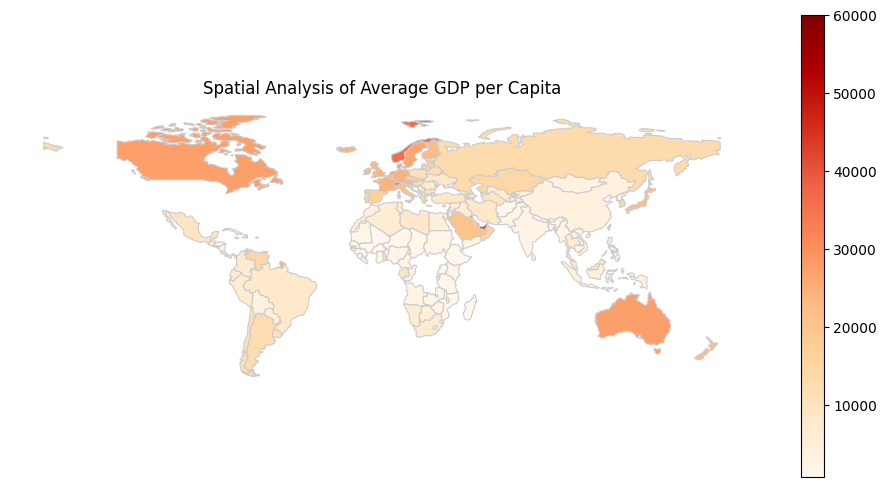

In [72]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(avg_gdp, how='left', left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(column='GDP per capita', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Spatial Analysis of Average GDP per Capita')
ax.axis('off')
plt.show()


<ipython-input-73-2d1a1576c67e>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<function matplotlib.pyplot.show(close=None, block=None)>

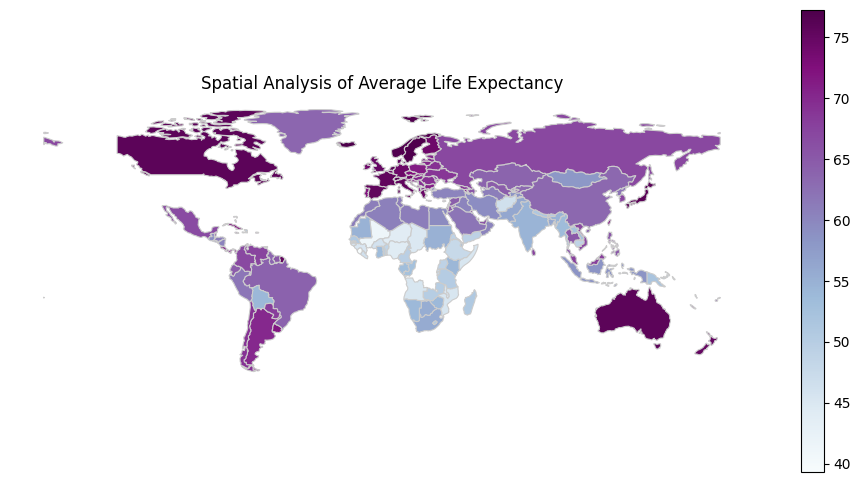

In [73]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

avg_le = df.groupby("Country")["Life expectancy"].mean().reset_index()

merged_data_le = world.merge(avg_le, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(figsize=(12, 6))
merged_data_le.plot(column='Life expectancy', cmap='BuPu', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Spatial Analysis of Average Life Expectancy')
ax.axis('off')
plt.show


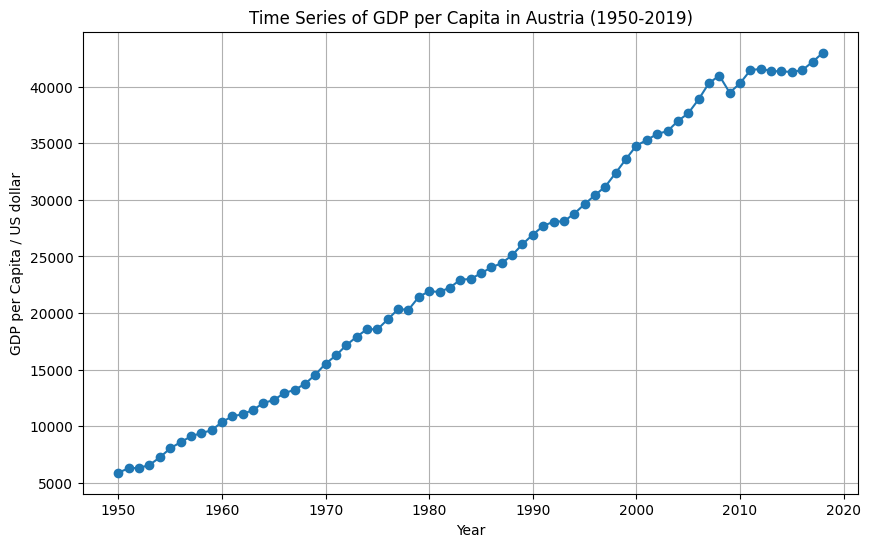

In [90]:
austria = df[(df['Country'] == 'Austria') & (df['Year'] >= 1950) & (df['Year'] <= 2019)]

plt.figure(figsize=(10, 6))
plt.plot(austria['Year'], austria['GDP per capita'], marker='o', linestyle='-')
plt.title('Time Series of GDP per Capita in Austria (1950-2019)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita / US dollar')
plt.grid(True)
plt.show()

The original time series plot shows the overall pattern of GDP per capita over the years, while the trend component highlights the long-term trend in GDP per capita. The residual component represents the remaining fluctuations after removing the trend and seasonal components, which may contain noise or irregularities in the data.


statsmodels demonstrates extensive functionality for time series analysis, including time series decomposition, autoregressive integrated moving average (ARIMA) modeling, seasonal decomposition of time series (STL), and more. These tools are useful for analyzing and forecasting time series data.

Here the seasonal decomposition is not necessary therefore I opted to erase the seasonal decomposition graph.


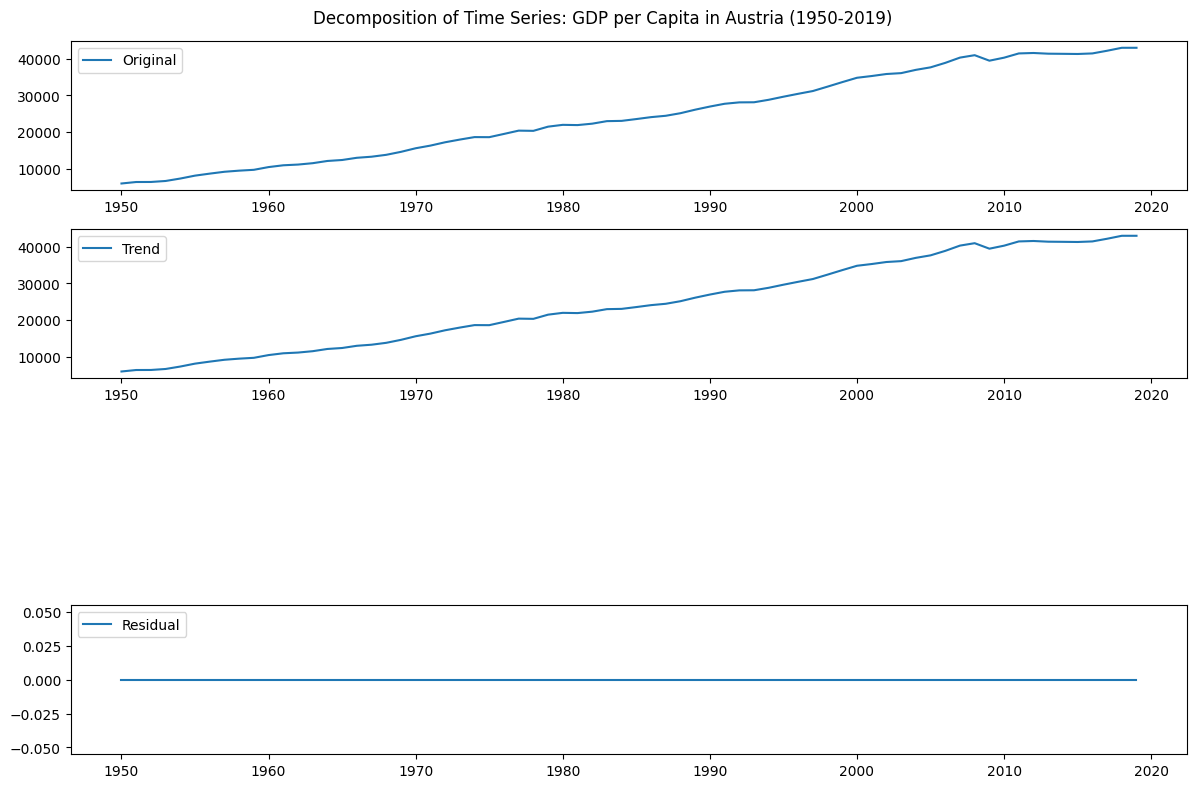

In [86]:
austria = df[(df['Country'] == 'Austria') & (df['Year'] >= 1950) & (df['Year'] <= 2019)]

avg_gdp_austria = austria.groupby('Year')['GDP per capita'].mean()

avg_gdp_austria = avg_gdp_austria.interpolate(method='linear')

avg_gdp_austria.index = pd.PeriodIndex(avg_gdp_austria.index, freq='A')

avg_gdp_austria.index = avg_gdp_austria.index.to_timestamp()

decom_austria = sm.tsa.seasonal_decompose(avg_gdp_austria, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(avg_gdp_austria, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decom_austria.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decom_austria.resid, label='Residual')
plt.legend(loc='upper left')

plt.suptitle('Decomposition of Time Series: GDP per Capita in Austria (1950-2019)')
plt.tight_layout()
plt.show()

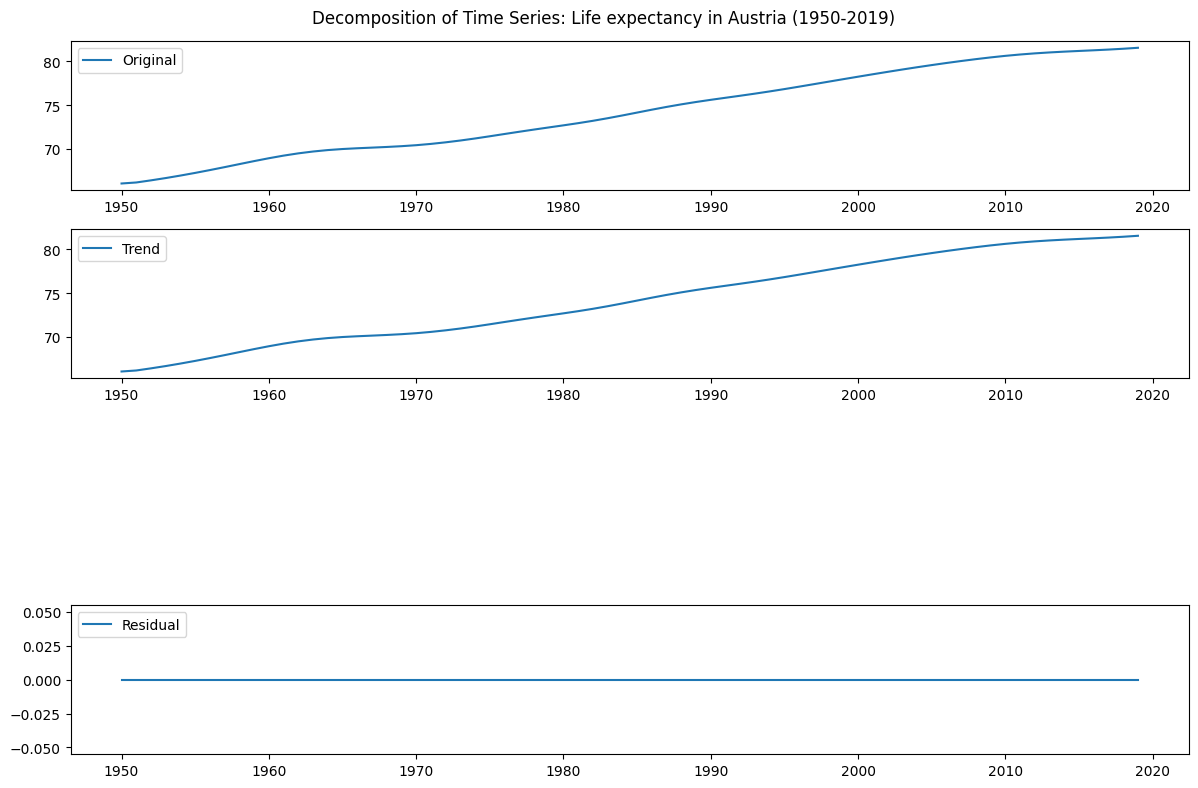

In [89]:
austria = df[(df['Country'] == 'Austria') & (df['Year'] >= 1950) & (df['Year'] <= 2019)]

avg_le_austria = austria.groupby('Year')['Life expectancy'].mean()

avg_le_austria  = avg_le_austria.interpolate(method='linear')

avg_le_austria.index = pd.PeriodIndex(avg_le_austria.index, freq='A')

avg_le_austria.index = avg_le_austria.index.to_timestamp()

decom_austria_le = sm.tsa.seasonal_decompose(avg_le_austria, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(avg_le_austria, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decom_austria_le.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decom_austria_le.resid, label='Residual')
plt.legend(loc='upper left')

plt.suptitle('Decomposition of Time Series: Life expectancy in Austria (1950-2019)')
plt.tight_layout()
plt.show()

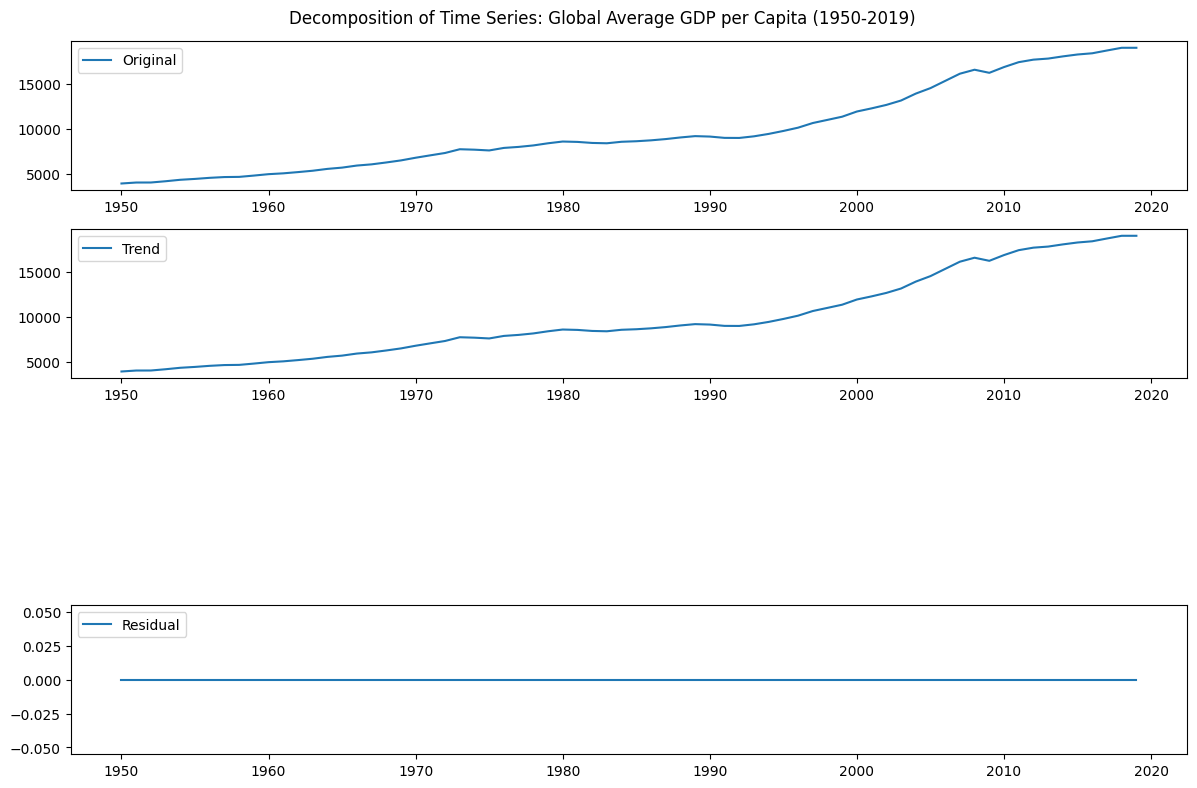

In [88]:
avg_gdp = df.groupby(["Year", "Country"])["GDP per capita"].mean().reset_index()

avg_gdp_world = avg_gdp.groupby('Year')['GDP per capita'].mean()

avg_gdp_world = avg_gdp_world.interpolate(method='linear')

avg_gdp_world.index = pd.PeriodIndex(avg_gdp_world.index, freq='A')

avg_gdp_world.index = avg_gdp_world.index.to_timestamp()

decom_world = sm.tsa.seasonal_decompose(avg_gdp_world, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(avg_gdp_world, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decom_world.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decom_world.resid, label='Residual')
plt.legend(loc='upper left')

plt.suptitle('Decomposition of Time Series: Global Average GDP per Capita (1950-2019)')
plt.tight_layout()
plt.show()


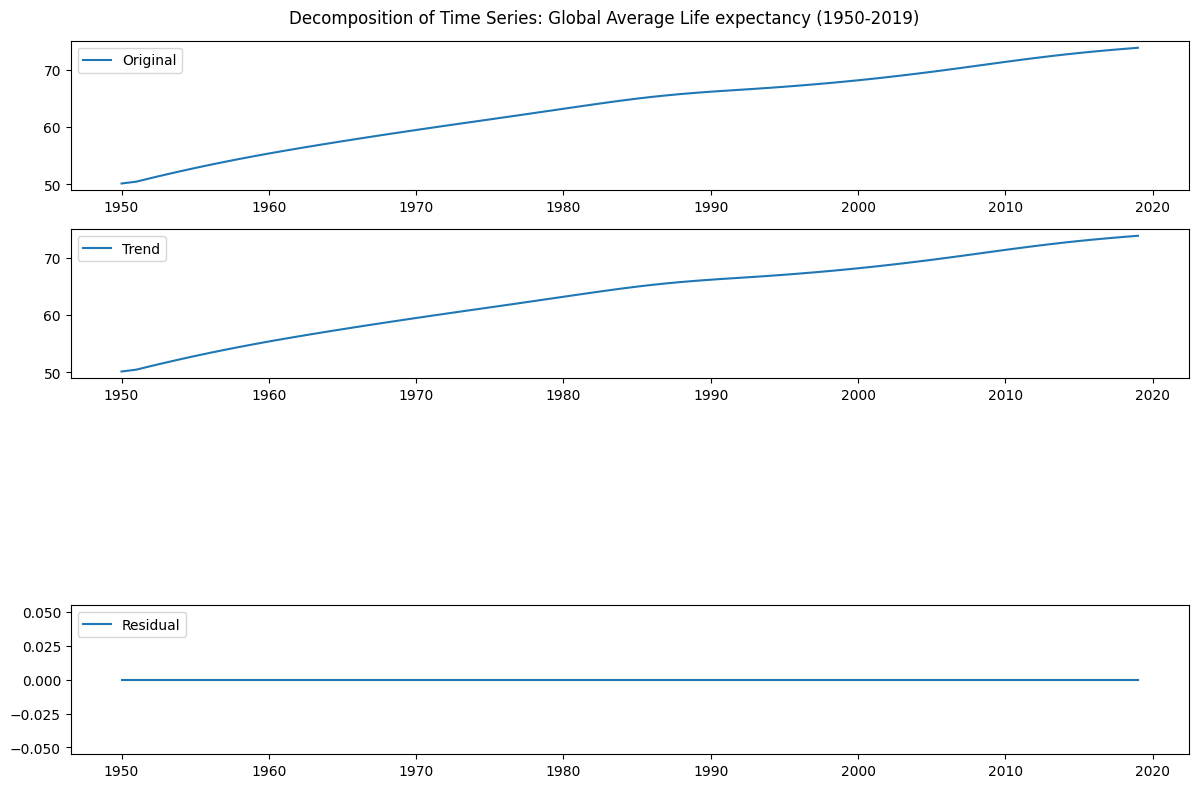

In [92]:
avg_le = df.groupby(["Year", "Country"])["Life expectancy"].mean().reset_index()

avg_le_world = avg_le.groupby('Year')['Life expectancy'].mean()

avg_le_world = avg_le_world.interpolate(method='linear')

avg_le_world.index = pd.PeriodIndex(avg_le_world.index, freq='A')

avg_le_world.index = avg_le_world.index.to_timestamp()

decom_world_le = sm.tsa.seasonal_decompose(avg_le_world, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(avg_le_world, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decom_world_le.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decom_world_le.resid, label='Residual')
plt.legend(loc='upper left')

plt.suptitle('Decomposition of Time Series: Global Average Life expectancy (1950-2019)')
plt.tight_layout()
plt.show()
